In [1]:
from keras.applications import VGG16
import os
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator

#setting the paths
baseDir = '/home/chen/LiChiChang/2020SpringThesis/dataset/CatDog/shrink'
trainDir = os.path.join(baseDir, 'train')
validationDir = os.path.join(baseDir, 'validation')
testDir = os.path.join(baseDir, 'test')

#the pretrain model from open sources
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

trainDatagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
trainGenerator = trainDatagen.flow_from_directory(trainDir, target_size=(150,150), batch_size=20, class_mode='binary')

validationDatagen = ImageDataGenerator(rescale=1./255)#validation and test dataset shouldn't be augmented
validationGenerator = validationDatagen.flow_from_directory(validationDir, target_size=(150,150), batch_size=20, class_mode='binary')

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable == True
    layer.trainable = set_trainable

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(trainGenerator, steps_per_epoch=100, epochs=100, validation_data=validationGenerator, validation_steps=50)

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
100/100 [==============================] - 13s 125ms/step - loss: 0.7172 - acc: 0.5660 - val_loss: 0.6183 - val_acc: 0.7060
Epoch 2/100
100/100 [==============================] - 11s 106ms/step - loss: 0.6436 - acc: 0.6310 - val_loss: 0.5551 - val_acc: 0.7820
Epoch 3/100
100/100 [==============================] - 10s 103ms/step - loss: 0.5960 - acc: 0.6795 - val_loss: 0.4785 - val_acc: 0.8030
Epoch 4/100
100/100 [==============================] - 10s 102ms/step - loss: 0.5539 - acc: 0.7110 - val_loss: 0.3805 - val_acc: 0.8220
Epoch 5/100
100/100 [==============================] - 10s 105ms/step - loss: 0.5433 - acc: 0.7285 - val_loss: 0.3548 - val_acc: 0.8320
Epoch 6/100
100/100 [============

the VGG model:
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 12

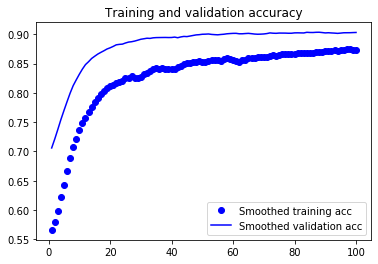

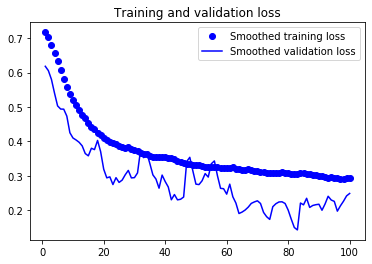

In [4]:
#plot and summary
print("the VGG model:")
conv_base.summary()
print("my model:")
model.summary()

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()